<a href="https://colab.research.google.com/github/TjAthena/Sentiment-AI-ML-Driven-Customer-Sentiment-Analysis/blob/main/Sentimental_Analysys_with_TD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re #for regular expressions
import nltk #for text manipulation
import string
import warnings


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Test.csv")
train[train['label'] == 0].head(10)

,text,label
0,"I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played ""Thunderbirds"" before school, during lunch and after school. We all wanted to be Virgil or Scott...",0
1,"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: A...",0
2,Why do people who do not know what a particular time in the past was like feel the need to try to define that time for others? Replace Woodstock with the Civil War and the Apollo moon-landing with...,0
3,"Even though I have great interest in Biblical movies, I was bored to death every minute of the movie. Everything is bad. The movie is too long, the acting is most of the time a Joke and the script...",0
5,"A terrible movie as everyone has said. What made me laugh was the cameo appearance by Scott McNealy, giving an award to one of the murdered programmers in front of a wall of SUN logos. McNealy is ...",0
7,"I caught this film on AZN on cable. It sounded like it would be a good film, a Japanese ""Green Card"". I can't say I've ever disliked an Asian film, quite the contrary. Some of the most incredible ...",0
11,"If you haven't seen the gong show TV series then you won't like this movie much at all, not that knowing the series makes this a great movie. <br /><br />I give it a 5 out of 10 because a few thin...",0
13,"Greg Davis and Bryan Daly take some crazed statements by a terrorists, add some commentary by a bunch of uber-right reactionaries, ascribe the most extreme positions of the most fundamentalist Mos...",0
14,"A half-hearted attempt to bring Elvis Presley into the modern day, but despite a sexy little shower scene and a pseudo-Playboy magazine subplot, Presley is surrounded by the same old coy, winking ...",0
17,"The main problem with ""Power"" is that it features way too may pointless characters and subplots that add absolutely nothing to the movie whatsoever. It gets boring after awhile, sitting around wai...",0


In [ ]:
train[train['label'] == 1].head(10)

,text,label
4,"Im a die hard Dads Army fan and nothing will ever change that. I got all the tapes, DVD's and audiobooks and every time i watch/listen to them its brand new. <br /><br />The film. The film is a re...",1
6,"Finally watched this shocking movie last night, and what a disturbing mindf**ker it is, and unbelievably bloody and some unforgettable scenes, and a total assault on the senses. Looks like a movie...",1
8,"It may be the remake of 1987 Autumn's Tale after eleven years, as the director Mabel Cheung claimed. Mabel employs rock music as the medium in this movie to express her personal attitude to life, ...",1
9,"My Super Ex Girlfriend turned out to be a pleasant surprise for me, I was really expecting a horrible movie that would probably be stupid and predictable, and you know what? It was! But this movie...",1
10,I can't believe people are looking for a plot in this film. This is Laural and Hardy. Lighten up already. These two were a riot. Their comic genius is as funny today as it was 70 years ago. Not a ...,1
12,"I have always been a huge fan of ""Homicide: Life On The Street"" so when I heard there was a reunion movie coming up, I couldn't wait.<br /><br />Let me just say, I was not disappointed at all. It ...",1
15,"If you want a fun romp with loads of subtle humor, then you will enjoy this flick.<br /><br />I don't understand why anyone wouldn't enjoy this one. Take it for what it is: a vehicle for Dennis Ho...",1
16,I really wanted to be able to give this film a 10. I've long thought it was my favorite of the four modern live-action Batman films to date (and maybe it still will be--I have yet to watch the Sch...,1
20,"Ever since I heard of the Ralph Bakshi version of ""The Lord of the Rings"" I wondered: What the hell is 'rotoscope' animation?!!! Well... I finally found out... I saw this movie about three years a...",1
22,I don't care if some people voted this movie to be bad. If you want the Truth this is a Very Good Movie! It has every thing a movie should have. You really should Get this one.,1


In [ ]:
train['label'].value_counts()

0    20019
1    19981
Name: label, dtype: int64

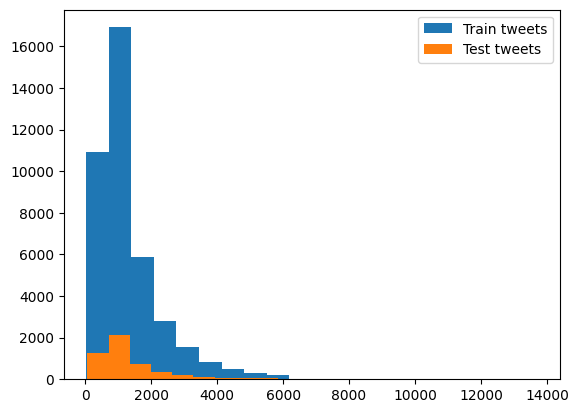

In [ ]:
length_train_dataset = train['text'].str.len()
length_test_dataset = test['text'].str.len()
plt.hist(length_train_dataset, bins=20,label="Train tweets")
plt.hist(length_test_dataset, bins=20,label="Test tweets")
plt.legend()
plt.show()

In [ ]:
combine=train.append(test,ignore_index=True) #train and test dataset are combined
combine.shape

<ipython-input-11-846eabe7f51a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combine=train.append(test,ignore_index=True) #train and test dataset are combined


(45000, 2)

In [ ]:
def remove_pattern(input_text,pattern):
    r= re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text

remove tweet handles

In [ ]:
combine['tidy_tweet'] = np.vectorize(remove_pattern)(combine['text'],"@[\w]*")
combine.head()

,text,label,tidy_tweet
0,"I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played ""Thunderbirds"" before school, during lunch and after school. We all wanted to be Virgil or Scott...",0,"I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played ""Thunderbirds"" before school, during lunch and after school. We all wanted to be Virgil or Scott..."
1,"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: A...",0,"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: A..."
2,Why do people who do not know what a particular time in the past was like feel the need to try to define that time for others? Replace Woodstock with the Civil War and the Apollo moon-landing with...,0,Why do people who do not know what a particular time in the past was like feel the need to try to define that time for others? Replace Woodstock with the Civil War and the Apollo moon-landing with...
3,"Even though I have great interest in Biblical movies, I was bored to death every minute of the movie. Everything is bad. The movie is too long, the acting is most of the time a Joke and the script...",0,"Even though I have great interest in Biblical movies, I was bored to death every minute of the movie. Everything is bad. The movie is too long, the acting is most of the time a Joke and the script..."
4,"Im a die hard Dads Army fan and nothing will ever change that. I got all the tapes, DVD's and audiobooks and every time i watch/listen to them its brand new. <br /><br />The film. The film is a re...",1,"Im a die hard Dads Army fan and nothing will ever change that. I got all the tapes, DVD's and audiobooks and every time i watch/listen to them its brand new. <br /><br />The film. The film is a re..."


In [ ]:
combine['tidy_tweet'] = combine['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
combine.head(10)

<ipython-input-15-b193699ac8a6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['tidy_tweet'] = combine['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")


,text,label,tidy_tweet
0,"I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played ""Thunderbirds"" before school, during lunch and after school. We all wanted to be Virgil or Scott...",0,I grew up b watching and loving the Thunderbirds All my mates at school watched We played Thunderbirds before school during lunch and after school We all wanted to be Virgil or Scott...
1,"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: A...",0,When I put this movie in my DVD player and sat down with a coke and some chips I had some expectations I was hoping that this movie would contain some of the strong points of the first movie A...
2,Why do people who do not know what a particular time in the past was like feel the need to try to define that time for others? Replace Woodstock with the Civil War and the Apollo moon-landing with...,0,Why do people who do not know what a particular time in the past was like feel the need to try to define that time for others Replace Woodstock with the Civil War and the Apollo moon landing with...
3,"Even though I have great interest in Biblical movies, I was bored to death every minute of the movie. Everything is bad. The movie is too long, the acting is most of the time a Joke and the script...",0,Even though I have great interest in Biblical movies I was bored to death every minute of the movie Everything is bad The movie is too long the acting is most of the time a Joke and the script...
4,"Im a die hard Dads Army fan and nothing will ever change that. I got all the tapes, DVD's and audiobooks and every time i watch/listen to them its brand new. <br /><br />The film. The film is a re...",1,Im a die hard Dads Army fan and nothing will ever change that I got all the tapes DVD s and audiobooks and every time i watch listen to them its brand new br br The film The film is a re...
5,"A terrible movie as everyone has said. What made me laugh was the cameo appearance by Scott McNealy, giving an award to one of the murdered programmers in front of a wall of SUN logos. McNealy is ...",0,A terrible movie as everyone has said What made me laugh was the cameo appearance by Scott McNealy giving an award to one of the murdered programmers in front of a wall of SUN logos McNealy is ...
6,"Finally watched this shocking movie last night, and what a disturbing mindf**ker it is, and unbelievably bloody and some unforgettable scenes, and a total assault on the senses. Looks like a movie...",1,Finally watched this shocking movie last night and what a disturbing mindf ker it is and unbelievably bloody and some unforgettable scenes and a total assault on the senses Looks like a movie...
7,"I caught this film on AZN on cable. It sounded like it would be a good film, a Japanese ""Green Card"". I can't say I've ever disliked an Asian film, quite the contrary. Some of the most incredible ...",0,I caught this film on AZN on cable It sounded like it would be a good film a Japanese Green Card I can t say I ve ever disliked an Asian film quite the contrary Some of the most incredible ...
8,"It may be the remake of 1987 Autumn's Tale after eleven years, as the director Mabel Cheung claimed. Mabel employs rock music as the medium in this movie to express her personal attitude to life, ...",1,It may be the remake of Autumn s Tale after eleven years as the director Mabel Cheung claimed Mabel employs rock music as the medium in this movie to express her personal attitude to life ...
9,"My Super Ex Girlfriend turned out to be a pleasant surprise for me, I was really expecting a horrible movie that would probably be stupid and predictable, and you know what? It was! But this movie...",1,My Super Ex Girlfriend turned out to be a pleasant surprise for me I was really expecting a horrible movie that would probably be stupid and predictable and you know what 

remove short words

In [ ]:
combine['tidy_tweet'] = combine['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) #removing words whose length is less than 3
combine.head()

,text,label,tidy_tweet
0,"I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played ""Thunderbirds"" before school, during lunch and after school. We all wanted to be Virgil or Scott...",0,grew watching loving Thunderbirds mates school watched played Thunderbirds before school during lunch after school wanted Virgil Scott wanted Alan Counting down from became form took children movi...
1,"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: A...",0,When this movie player down with coke some chips some expectations hoping that this movie would contain some strong points first movie Awsome animation good flowing story excellent voice cast funn...
2,Why do people who do not know what a particular time in the past was like feel the need to try to define that time for others? Replace Woodstock with the Civil War and the Apollo moon-landing with...,0,people know what particular time past like feel need define that time others Replace Woodstock with Civil Apollo moon landing with Titanic sinking realistic flick this formulaic soap opera populat...
3,"Even though I have great interest in Biblical movies, I was bored to death every minute of the movie. Everything is bad. The movie is too long, the acting is most of the time a Joke and the script...",0,Even though have great interest Biblical movies bored death every minute movie Everything movie long acting most time Joke script horrible point mixing story about Abraham Noah together value your...
4,"Im a die hard Dads Army fan and nothing will ever change that. I got all the tapes, DVD's and audiobooks and every time i watch/listen to them its brand new. <br /><br />The film. The film is a re...",1,hard Dads Army nothing will ever change that tapes audiobooks every time watch listen them brand film film certain episodes hour Enemy within gates Battle School numerous others with different edg...


In [ ]:
tokenized_tweet = combine['tidy_tweet'].apply(lambda x:x.split()) #it will split all words by whitespace
tokenized_tweet.head()

0    [grew, watching, loving, Thunderbirds, mates, school, watched, played, Thunderbirds, before, school, during, lunch, after, school, wanted, Virgil, Scott, wanted, Alan, Counting, down, from, became...
1    [When, this, movie, player, down, with, coke, some, chips, some, expectations, hoping, that, this, movie, would, contain, some, strong, points, first, movie, Awsome, animation, good, flowing, stor...
2    [people, know, what, particular, time, past, like, feel, need, define, that, time, others, Replace, Woodstock, with, Civil, Apollo, moon, landing, with, Titanic, sinking, realistic, flick, this, f...
3    [Even, though, have, great, interest, Biblical, movies, bored, death, every, minute, movie, Everything, movie, long, acting, most, time, Joke, script, horrible, point, mixing, story, about, Abraha...
4    [hard, Dads, Army, nothing, will, ever, change, that, tapes, audiobooks, every, time, watch, listen, them, brand, film, film, certain, episodes, hour, Enemy, within, gates, Ba

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) #it will stemmatized all

In [ ]:
#now let's combine these tokens back

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) #concat all words into one sentence
    combine['tidy_tweet'] = tokenized_tweet

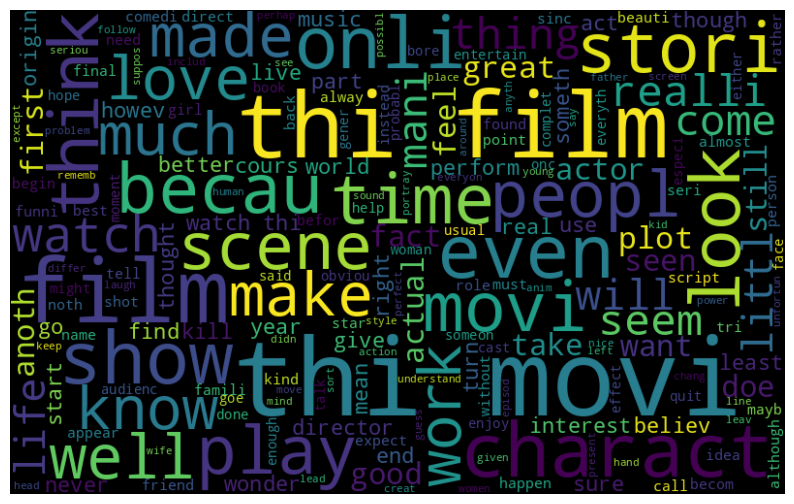

In [ ]:
all_words = ' '.join([text for text in combine['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


seperate cloud

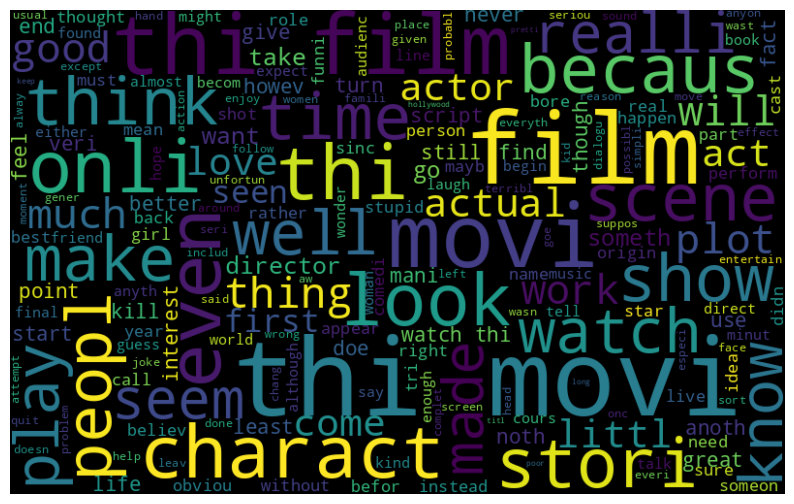

In [ ]:
normal_words= ' '.join([text for text in combine['tidy_tweet'][combine['label']==0]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

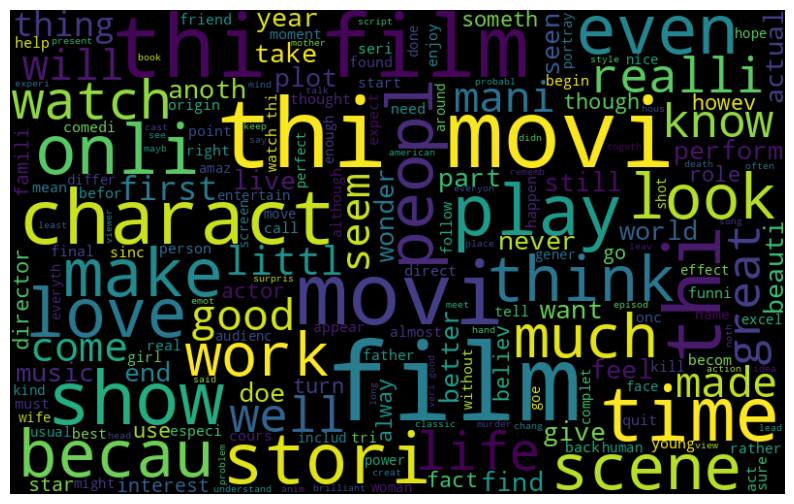

In [ ]:
negative_words= ' '.join([text for text in combine['tidy_tweet'][combine['label']==1]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#collect hashtags

def hashtag_extract(x):
    hashtags=[]
    for i in x: #loop over words contain in tweet
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [ ]:
#extracting hashtags from non racist tweets
ht_regular = hashtag_extract(combine['tidy_tweet'][combine['label']==0])
#extracting hashtags from racist tweets
ht_negative=hashtag_extract(combine['tidy_tweet'][combine['label']==1])
ht_regular = sum(ht_regular,[])
ht_negative = sum(ht_negative,[])

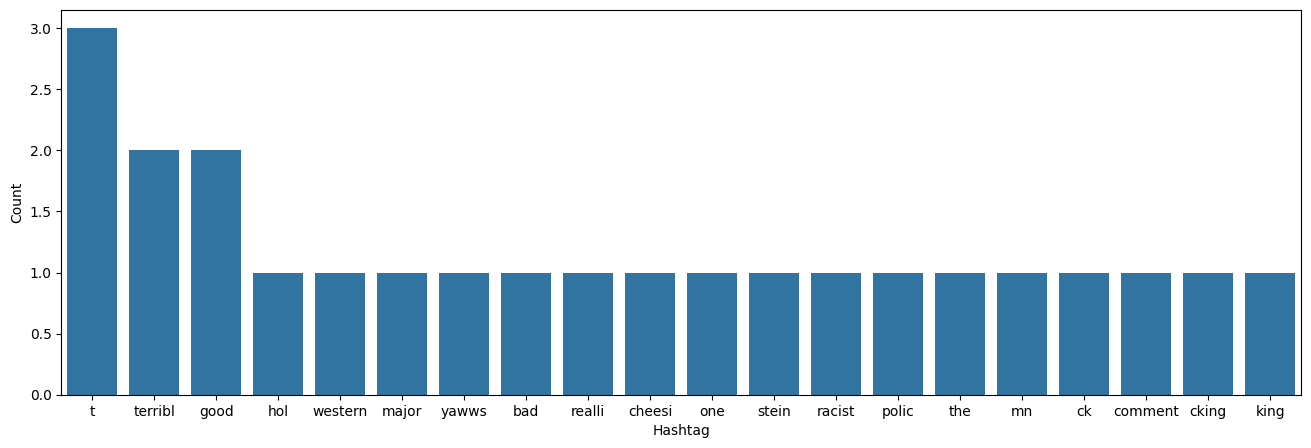

In [ ]:
#non-racist tweets

nonracist_tweets = nltk.FreqDist(ht_regular)
df1 = pd.DataFrame({'Hashtag': list(nonracist_tweets.keys()),'Count':list(nonracist_tweets.values())})

#selecting top 20 most frequent hashtags
df1 = df1.nlargest(columns="Count",n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df1, x="Hashtag", y="Count")
ax.set(ylabel = "Count")
plt.show()

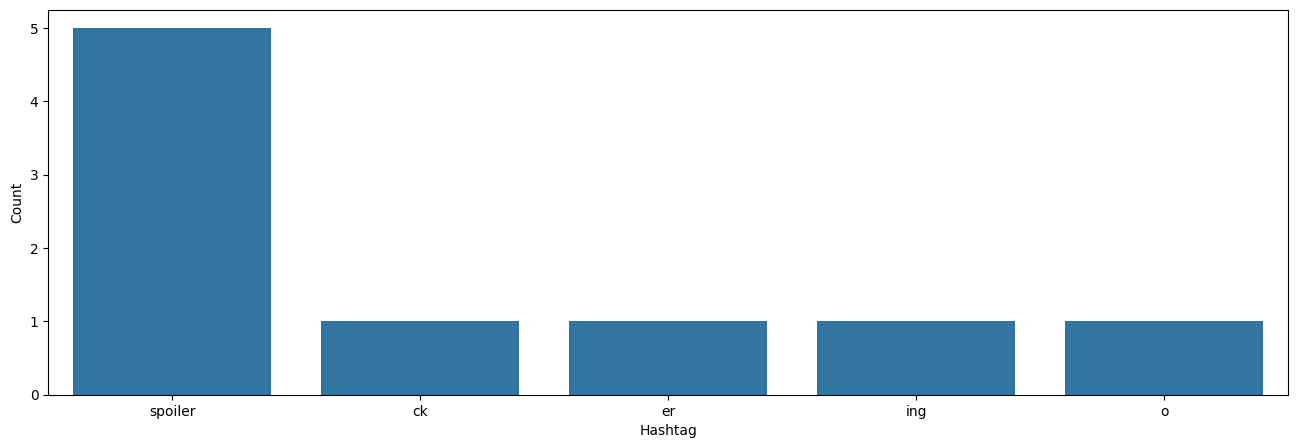

In [ ]:
#racist tweets

racist_tweets = nltk.FreqDist(ht_negative)
df2 = pd.DataFrame({'Hashtag': list(racist_tweets.keys()),'Count': list(racist_tweets.values())}) #count number of occurrence of particular word

#selecting top 20 frequent  hashtags

df2 = df2.nlargest(columns = "Count",n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df2, x="Hashtag",y="Count")
plt.show()

In [ ]:
pip install gensim

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [ ]:
#Bag-of-words

#Each row in matrix M contains the frequency of tokens(words) in the document D(i)

bow_vectorizer = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(combine['tidy_tweet']) # tokenize and build vocabulary
bow.shape

(45000, 1000)

In [ ]:
#TF-IDF

#TF = (number of times term appear in a document)/(Number of terms in dcoument)
#IDF = log(N/n)-N is nummber of documents and n is number of documents a term has appeared in.

#TF-IDF = TF * IDF

#tfidf_vectorizer= TfidfVectorizer(max_df=0.90, min_df=2,max_features =1000,stop_words='english')
#tfidf = tfidf_vectorizer.fit_transform(combine['tidy_tweet'])
#tfidf.shape

In [ ]:
combine=combine.fillna(0) #replace all null values by 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, combine['label'],
                                                    test_size=0.2, random_state=69)

In [ ]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (36000, 1000)
X_test_shape :  (9000, 1000)
y_train_shape :  (36000,)
y_test_shape :  (9000,)


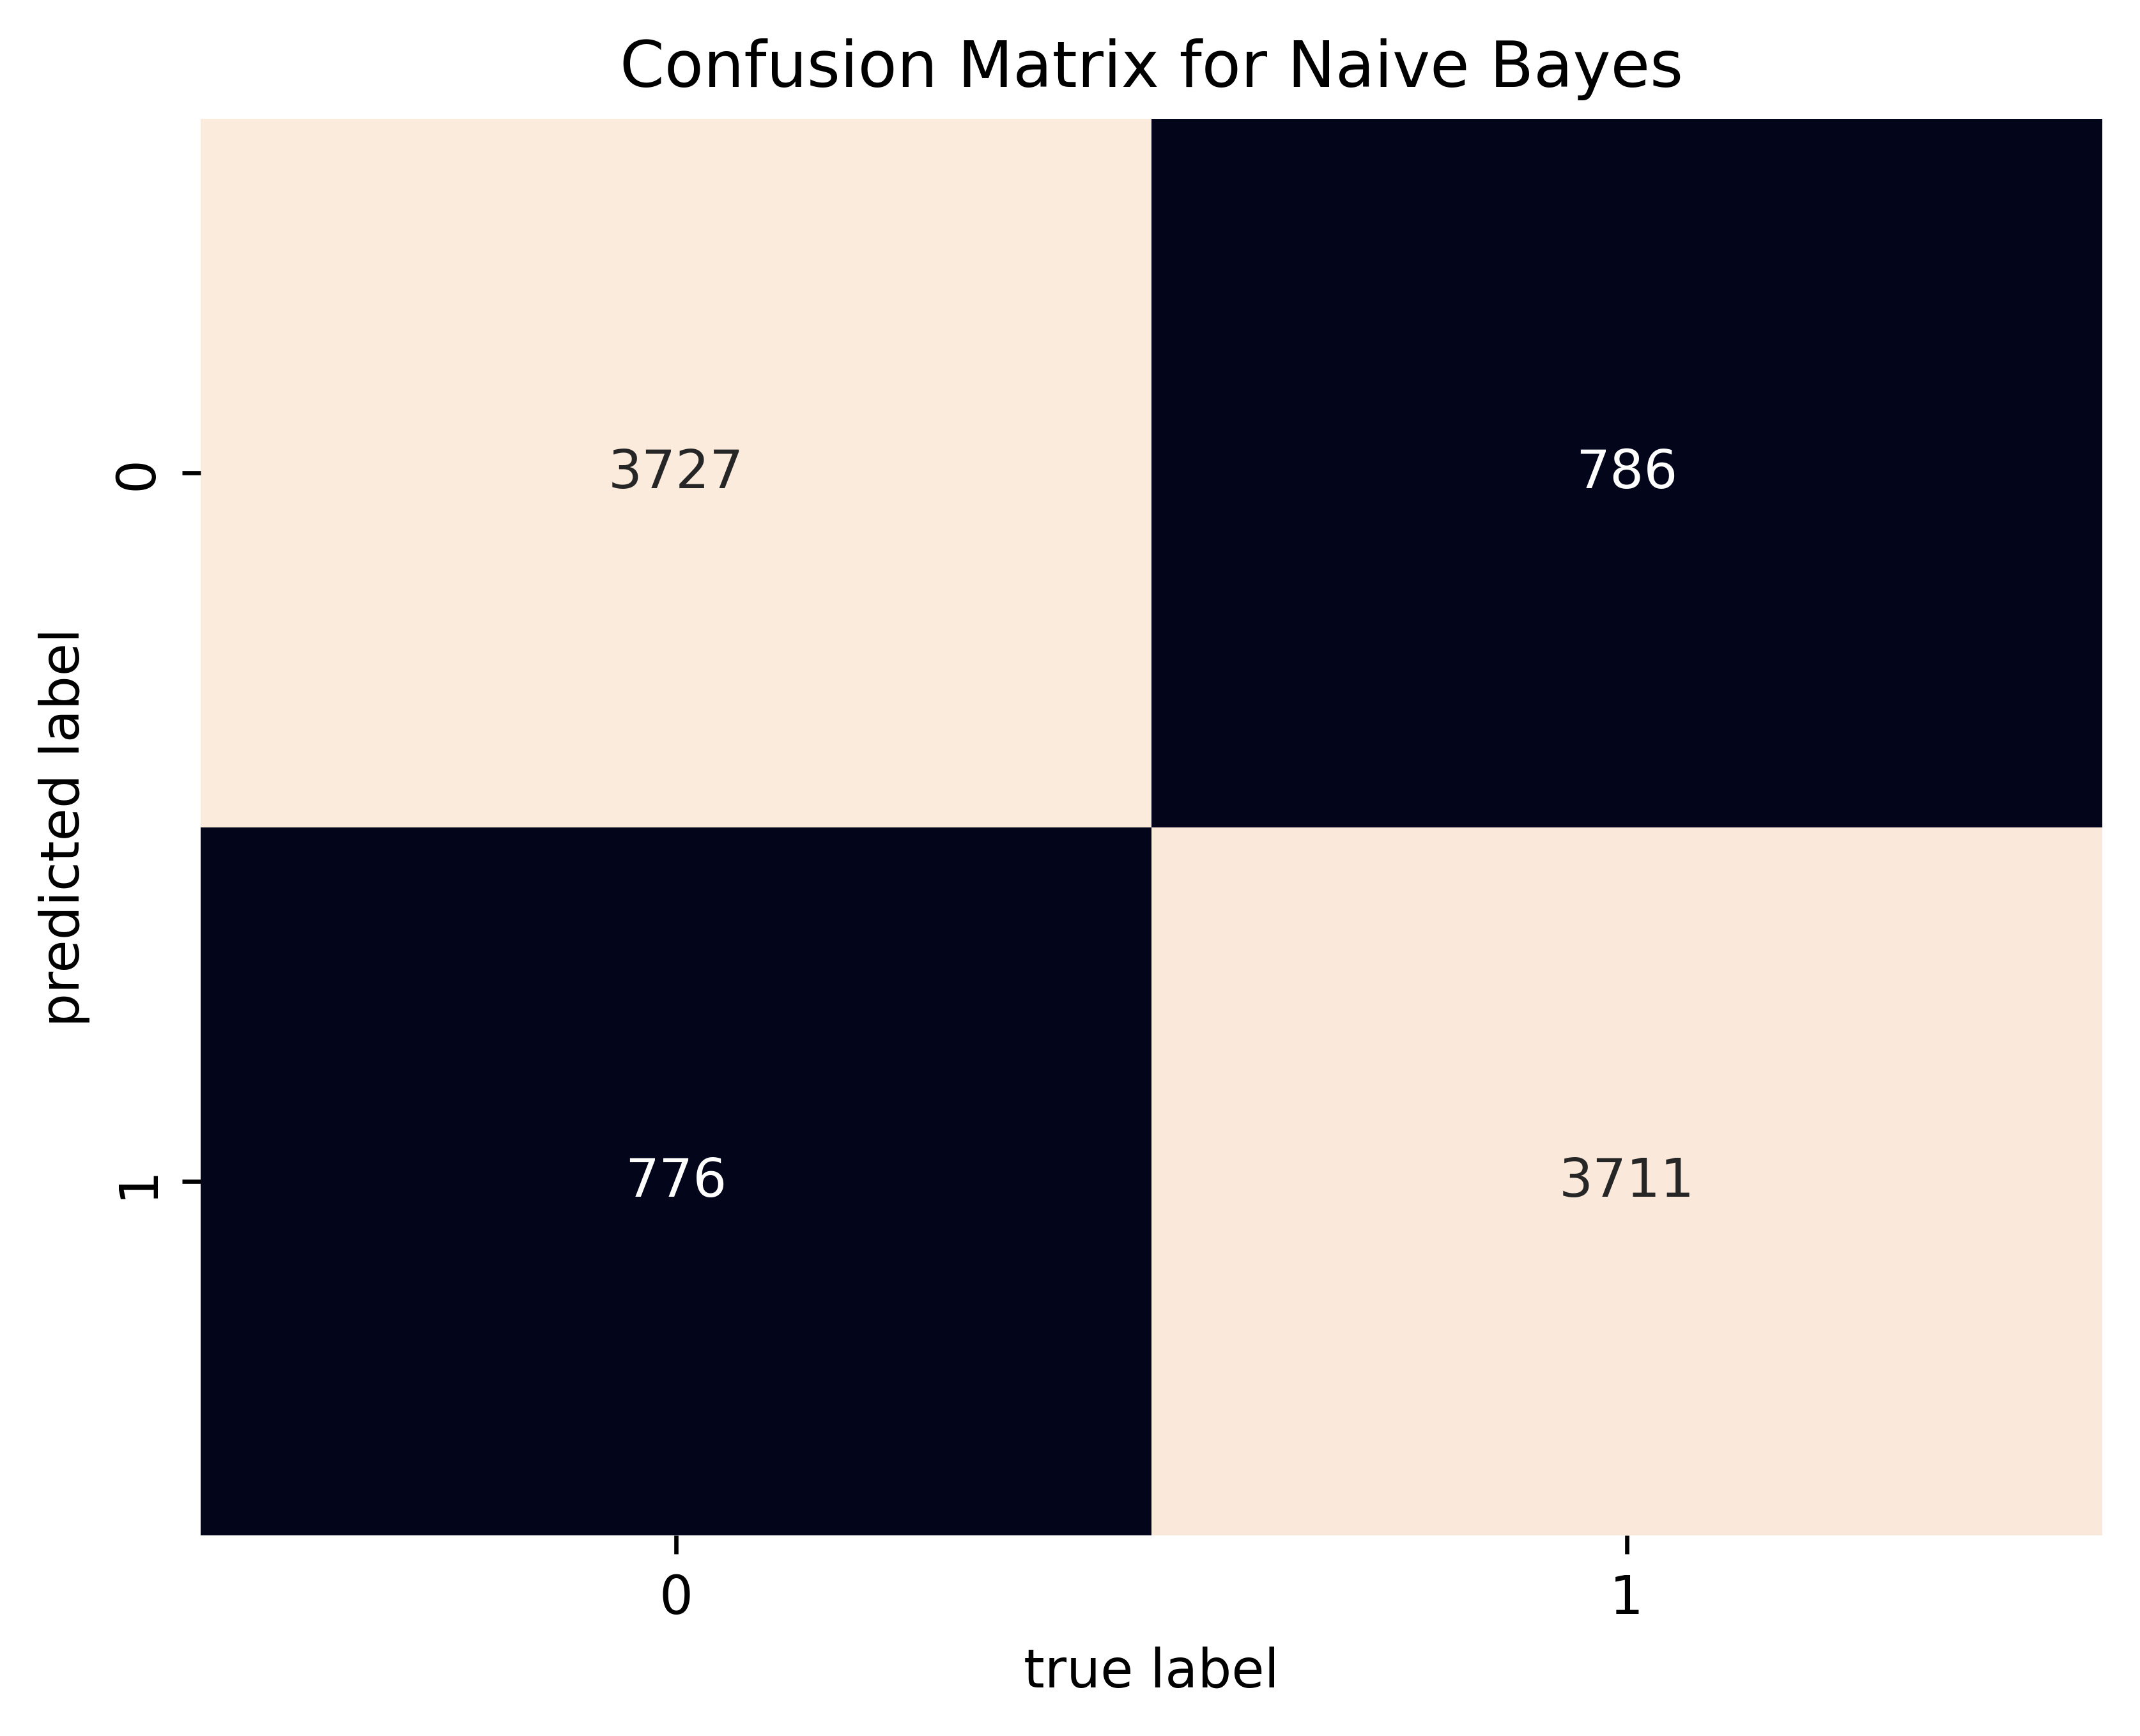

In [ ]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train)
predicted_naive = model_naive.predict(X_test)
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive * 100 ,"%")

Accuracy with Naive-bayes:  82.64444444444445 %
